In [27]:
import numpy as np
import pandas as pd
import scipy

from scipy import signal as signal
from math import *
from matplotlib import pyplot as plt
import scipy.io
import os
import scipy.io.wavfile as wav

from scipy.fftpack import fft
from scipy.signal import lfilter

In [28]:
##Function to convert the mat lab data into csv for pandas

def convert_to_CSV(data,filename):
    for i in data:
        if '__' not in i and 'readme' not in i:
            np.savetxt((filename+".csv"),data[i],delimiter=',')

In [29]:
#scipy to load matlab files
#takes in matlab file path name
def load(matlabfile):
    matdata = scipy.io.loadmat(matlabfile)
    data = matdata['data']
    return data

In [30]:
#normal plotting function
#takes in data we want to plot, name of the file
#saves it as a png file
def plot(data, filename):
    plt.figure(figsize=(20,10))##change the size of the charts
    plt.plot(data)
    plt.show()
    plt.savefig(filename+".png",bbox_inches='tight')

In [53]:
#butter filter
#data is the thing we want to filter
#to edit the params of the butter filter, change the function variables inside here
def butter(data , filename):
    b, a = signal.butter(20, .3, 'low', analog=False)#our defult values
    fil = signal.filtfilt(b, a, data, method='gust')#applying the filter
    #fil = np.array(filtered)
    plt.figure(figsize=(20,10))##change the size of the charts
    plt.plot(fil)
    plt.show()
    plt.savefig("Butter_"+filename+".png",bbox_inches='tight')
    return fil 

In [59]:
#chevy 1 filter
def chevy(data, filename):
    b, a = signal.cheby1(20, 2, .3, 'lowpass', analog = False, output = 'ba' )
    fil = signal.filtfilt(b, a, data, method='gust')#applying the filter
    plt.figure(figsize=(20,10))##change the size of the charts
    plt.plot(fil)
    plt.show()
    plt.savefig("chevy_"+filename+".png",bbox_inches='tight')
    return fil 

In [32]:
#plots fft and saves it as png
#takes in the wav file name, the name we want our png to be
def fft_fig(wavfilename, filename):
    fs, data = wav.read(wavfilename+".wav")
    a = data.T 
    b=[(ele/2**8.)*2-1 for ele in a] 
    c = fft(b) 

    plt.figure(figsize=(20,10))
    plt.axis([0,fs/2,0,abs(max(c))])
    plt.plot(abs(c),'r') 
    plt.show()
    plt.savefig(filename+".png",bbox_inches='tight')


In [33]:
#Takes in our data, saves it as a wav file
#def save_wav(data, filename, FS):
#    wav.write(filename+".wav", FS, ((data + data.min()) * (2 ** 15) / data.ptp()).astype(np.int16))

In [34]:
#####USE THIS
def save_wav(data, filename, FS):
    wav.write(filename+".wav", FS, data)

In [ ]:
#
def readwav(wavfilename):
    fs, data = wav.read(wavfilename+".wav")
    
   


In [54]:
####USE THIS TO READ WAV FILES

FS, data = wav.read('CF3_amp100.wav');


In [36]:
FS

10666

In [37]:
data

array([-1313, -1472, -1073, ...,   789,   628,   625], dtype=int16)

In [38]:
save_wav(data, 'TEST', FS)

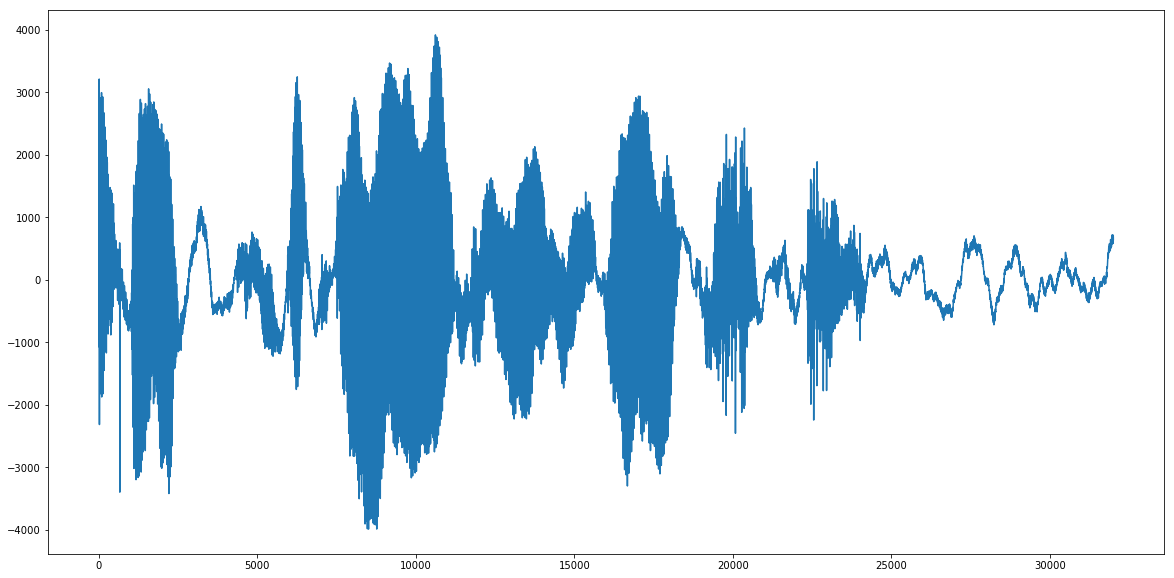

In [55]:
fil = butter(data, 'female')

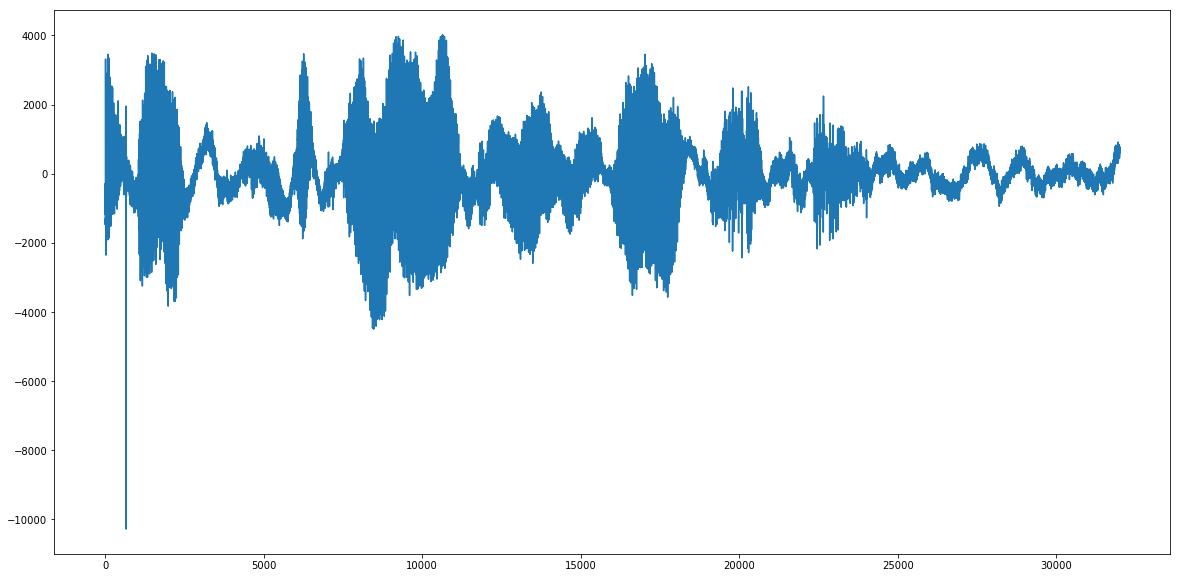

In [40]:
plot(data, 'female')

In [56]:
save_wav(fil, 'butter', FS)

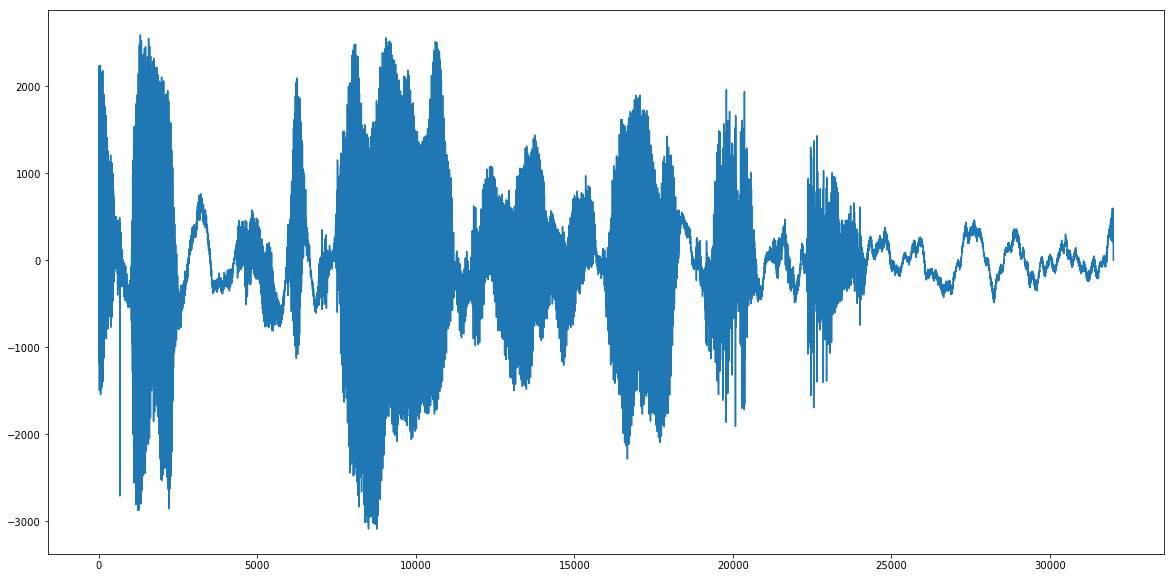

In [60]:
chev = chevy(data, 'chevy')

In [62]:
save_wav(chev, 'chevy', FS)

In [42]:
fil

array([   55.52711226,  -851.66554183, -1160.85851609, ...,   705.55700057,
         680.13479708,   642.18358766])

In [43]:
data

array([-1313, -1472, -1073, ...,   789,   628,   625], dtype=int16)

In [44]:
fil.shape

(32000,)

In [45]:
data.shape

(32000,)

In [11]:
#plays the sound using os
#takes in wav file name
def play(filename):
    os.system(filename)

Below is just testing of the above functions

In [8]:
f1data = load('12-1-2017/female1_plastic_A_1.mat')

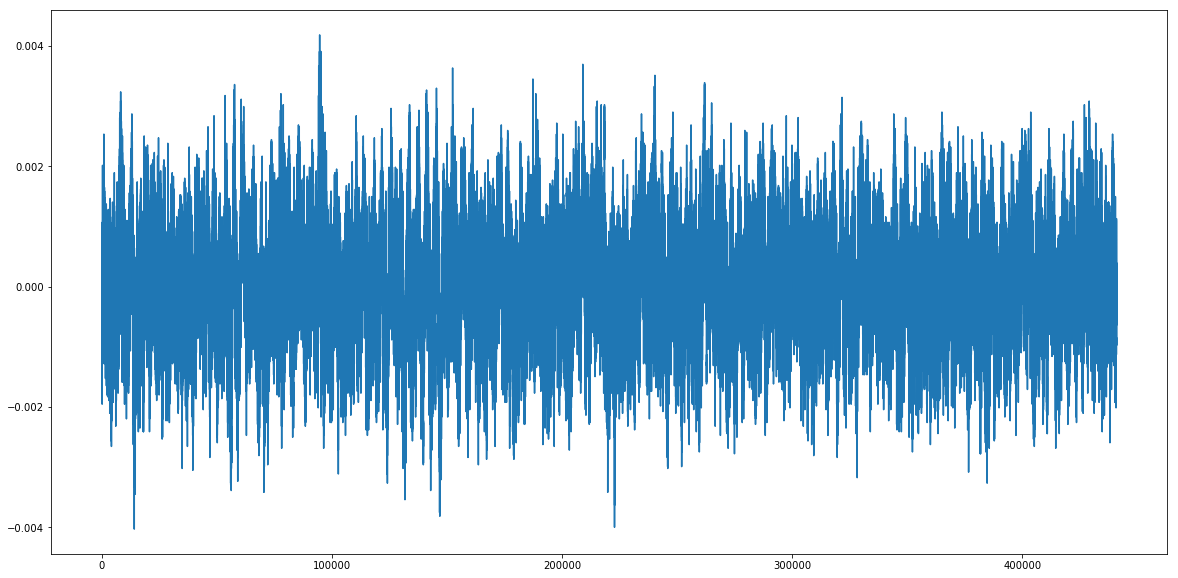

In [9]:
plot(f1data, "f1data")

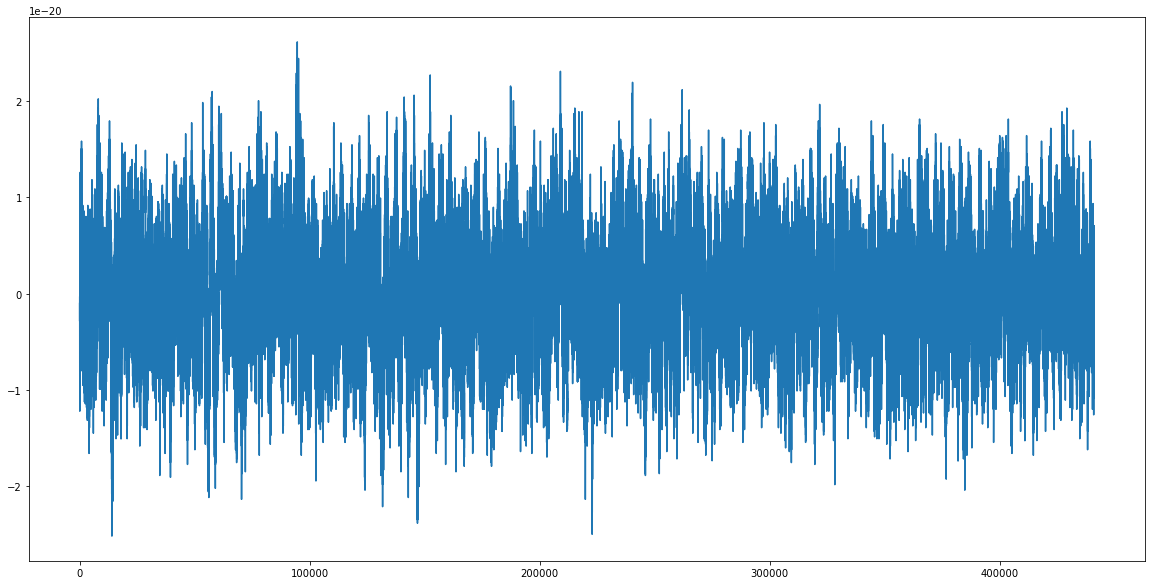

In [10]:
filtered_f1 = butter(f1data, "f1data")

In [10]:
save_wav(filt_f1,"filt_f1")